In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

features = pd.read_csv("C:/Users/TFG155/Desktop/인공지능개론/데이터/Raisin_Dataset.csv", index_col = None, header = 0)
features

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


In [2]:
features.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

Text(0.5, 1.0, 'Label')

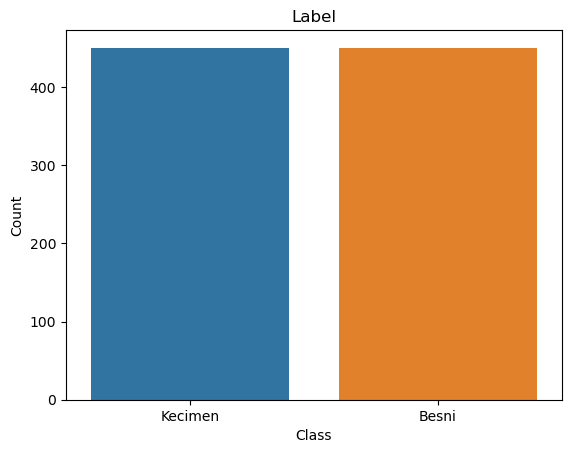

In [3]:
sns.countplot(x = features['Class'])
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Label")

In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in features.columns:
    features[i] = le.fit_transform(features[i])

In [5]:
X = features.iloc[:,0:7].values
y = features.iloc[:,7].values

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [25]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(100,input_shape=(7,),activation='relu'))
model.add(Dense(80,activation='relu'))
model.add(Dense(60,activation='relu'))
model.add(Dense(2,activation='softmax'))

model.compile(Adam(lr=0.04),'binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 100)               800       
                                                                 
 dense_25 (Dense)            (None, 80)                8080      
                                                                 
 dense_26 (Dense)            (None, 60)                4860      
                                                                 
 dense_27 (Dense)            (None, 2)                 122       
                                                                 
Total params: 13,862
Trainable params: 13,862
Non-trainable params: 0
_________________________________________________________________


c:\Users\TFG155\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [26]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
23/23 [==============================] - 1s 13ms/step - loss: 33.5647 - accuracy: 0.6097 - val_loss: 0.7010 - val_accuracy: 0.6722
Epoch 2/100
23/23 [==============================] - 0s 5ms/step - loss: 0.5846 - accuracy: 0.7319 - val_loss: 0.4019 - val_accuracy: 0.8278
Epoch 3/100
23/23 [==============================] - 0s 4ms/step - loss: 0.4463 - accuracy: 0.8236 - val_loss: 0.4216 - val_accuracy: 0.8556
Epoch 4/100
23/23 [==============================] - 0s 4ms/step - loss: 0.4191 - accuracy: 0.8167 - val_loss: 0.4983 - val_accuracy: 0.8111
Epoch 5/100
23/23 [==============================] - 0s 4ms/step - loss: 0.5097 - accuracy: 0.7972 - val_loss: 0.3588 - val_accuracy: 0.8278
Epoch 6/100
23/23 [==============================] - 0s 5ms/step - loss: 0.3926 - accuracy: 0.8375 - val_loss: 0.3524 - val_accuracy: 0.8389
Epoch 7/100
23/23 [==============================] - 0s 4ms/step - loss: 0.4047 - accuracy: 0.8403 - val_loss: 0.3903 - val_accuracy: 0.8889
Epoch 8/100

In [27]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        97
           1       0.90      0.86      0.88        83

    accuracy                           0.89       180
   macro avg       0.89      0.89      0.89       180
weighted avg       0.89      0.89      0.89       180

[[89  8]
 [12 71]]
